# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie I : Regréssion Multiple**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [1]:
import numpy as np  # Importer numpy pour la manipulation de tableaux et opérations mathématiques
import pandas as pd  # Importer pandas pour la manipulation de données structurées
import matplotlib.pyplot as plt  # Importer matplotlib.pyplot pour la visualisation de données

DF = pd.read_csv('data.csv')  # Charger les données depuis un fichier CSV dans un DataFrame pandas
DF.head()  # Afficher les cinq premières lignes du DataFrame pour obtenir un aperçu rapide des données


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [45]:
X = DF[['Volume', 'Weight']]

### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [46]:
Y= DF['CO2']

### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [47]:
from sklearn.linear_model import LinearRegression
#creation de model
model = LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [48]:
#entrainement de model
model.fit(X, Y)

LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [49]:
import pandas as pd
new_data = pd.DataFrame([[1300, 2300]], columns=['Volume', 'Weight'])
predictions = model.predict(new_data)
print("Predicted CO2 emissions:", predictions[0])

Predicted CO2 emissions: 107.20873279892223


### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [50]:
coefficients = model.coef_
print("Coefficient pour le Volume:", coefficients[0])
print("Coefficient pour le Poids:", coefficients[1])

Coefficient pour le Volume: 0.0078052575277471215
Coefficient pour le Poids: 0.007550947270300686


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [52]:
from sklearn.datasets import make_regression
np.random.seed(0)
x,y=make_regression(n_samples=100, n_features=1, noise=10)
y=y**2

poly_features=PolynomialFeatures(degree=2, include_bias=False)
x=poly_features.fit_transform(x)

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

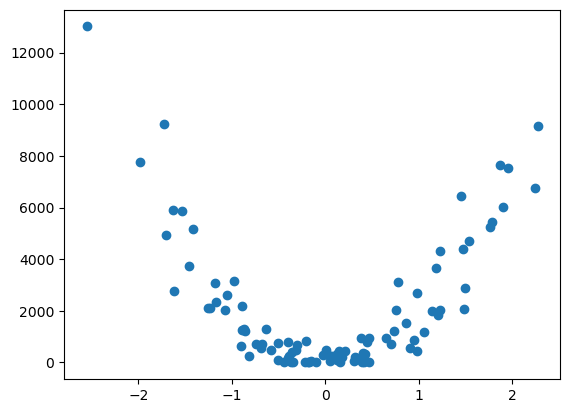

In [62]:
plt.scatter(x[:,0], y) #pour l'affichage 

### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [54]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(max_iter=100, eta0=0.0001)

### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [55]:
model.fit(x,y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [56]:
print("coefficient de détermination= ",model.score(x,y))

coefficient de détermination=  0.2386988653687795


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

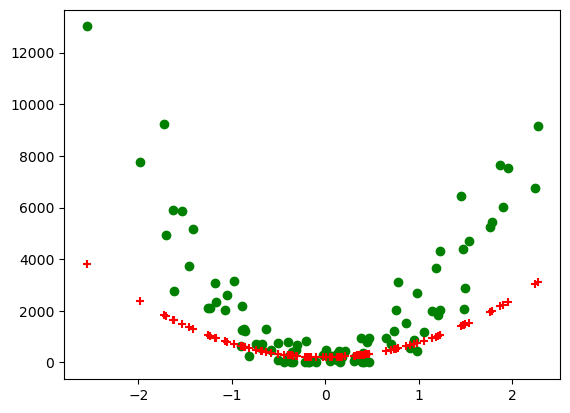

In [57]:
plt.scatter(x[:,0], y, marker='o', c='green')
plt.scatter(x[:,0], model.predict(x), c='red', marker='+')            

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

coefficient de détermination=  0.8940620198336068


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


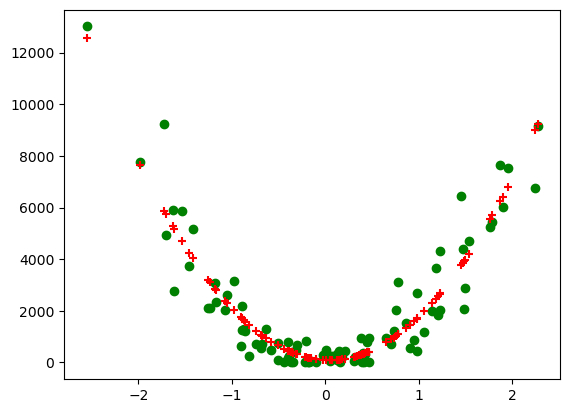

In [60]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)
print("coefficient de détermination= ",model.score(x,y))
plt.scatter(x[:,0], y, marker='o', c='green')
plt.scatter(x[:,0], model.predict(x), c='red', marker='+')            